# Classifying the Iris Data Set with PyTorch.

Import libraries

In [ ]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

# Load iris dataset

In [ ]:
# Load data from pc
from google.colab import files
uploaded = files.upload()

# load dataset
df = pd.read_csv("iris.data", header = None)

Saving iris.data to iris (6).data


In [ ]:
# first samples
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preparation for applying deep neural network using pytorch

In [ ]:
# add column names into the dataframe df
df.columns = [
    "sepal length [cm]",
    "sepal width [cm]",
    "petal length [cm]",
    "petal width [cm]",
    "species",
]

# display df with names
df.head()

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# check unique values of species (class label)
print(df["species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
# transform class label into numerical values (Iris-setosa: 0, Iris-versicolar: 1, and Iris-virginica: 2)
# create mapping
mappings = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2,
}

# transform
# apply mapping[x] to each element of species column
df["species"] = df["species"].apply(lambda x: mappings[x])

In [ ]:
# check new species values
df.head()

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Display and analyze data using Matplotlib and seaborn

In [ ]:
# get colors by classes to color in the next plto

# create dict to colors
colorMap = {
    0: "r",
    1: "g",
    2: "b",
}

# get colors for each element in species column
colors = df["species"].apply(lambda x: colorMap[x])

array([[<Axes: xlabel='sepal length [cm]', ylabel='sepal length [cm]'>,
        <Axes: xlabel='sepal width [cm]', ylabel='sepal length [cm]'>,
        <Axes: xlabel='petal length [cm]', ylabel='sepal length [cm]'>,
        <Axes: xlabel='petal width [cm]', ylabel='sepal length [cm]'>,
        <Axes: xlabel='species', ylabel='sepal length [cm]'>],
       [<Axes: xlabel='sepal length [cm]', ylabel='sepal width [cm]'>,
        <Axes: xlabel='sepal width [cm]', ylabel='sepal width [cm]'>,
        <Axes: xlabel='petal length [cm]', ylabel='sepal width [cm]'>,
        <Axes: xlabel='petal width [cm]', ylabel='sepal width [cm]'>,
        <Axes: xlabel='species', ylabel='sepal width [cm]'>],
       [<Axes: xlabel='sepal length [cm]', ylabel='petal length [cm]'>,
        <Axes: xlabel='sepal width [cm]', ylabel='petal length [cm]'>,
        <Axes: xlabel='petal length [cm]', ylabel='petal length [cm]'>,
        <Axes: xlabel='petal width [cm]', ylabel='petal length [cm]'>,
        <Axes: xlabel

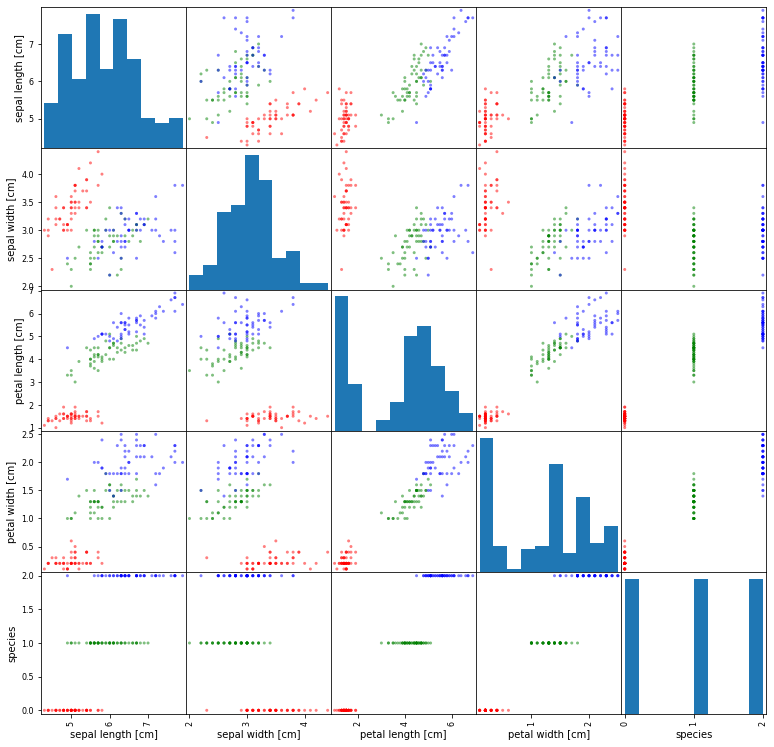

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot variable distributions and its relationships colored by classes
pd.plotting.scatter_matrix(
    df,
    color=colors,
    figsize = (13, 13)
)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

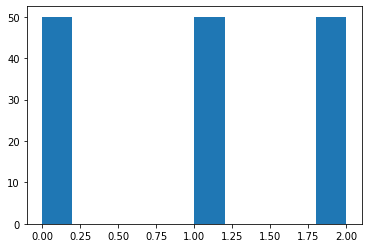

In [ ]:
# class analysis to see prevalence rate
fig, ax = plt.subplots()
ax.hist(df["species"])

# Get data to train model

In [ ]:
# get X from dataframe df
X = df.drop("species", axis = 1).values
# get lables from dataframe df
y = df["species"].values

In [ ]:
# split dataset into training and testing
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.50)

In [ ]:
# split into validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size = 0.50)

In [ ]:
# check datsets shapes
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(150, 4)
(75, 4)
(37, 4)
(38, 4)


In [ ]:
# check data type of arrays
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
# transfor each numpy array into torch tensors 
X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)
y_test = torch.LongTensor(y_test)

# Creating NN model

In [ ]:
# define model
# you need to define 1) init method and 2) forward method
class my_neural_network(nn.Module):
    
    # init method
    # here define the layers 
    def __init__(self, input_dim = 4, hidden_layer = 25, output_dim = 3):
        
        super().__init__()
        
        # first fully connected layer
        # parameters: input dim and output dim
        self.fc1 = nn.Linear(input_dim, hidden_layer)
        
        # second layer 
        self.fc2 = nn.Linear(hidden_layer, hidden_layer)
        
        # activation function
        self.act = nn.ReLU()
        
        # output layer
        self.output = nn.Linear(hidden_layer, output_dim)
    
    
    # forward method
    # here define how to informations is going to pass inside the model
    def forward(self, x):
        
        # first layer
        # output = activation ( layer 1 (x) )
        x = self.act(self.fc1(x))
        
        # second layer
        # output = activation ( layer 2 (x) )
        x = self.act(self.fc2(x))
        
        # output layer
        x = self.output(x)

        
        # return ouput
        return x

In [ ]:
# define model
model = my_neural_network()

#display model structure
print(model)

my_neural_network(
  (fc1): Linear(in_features=4, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=25, bias=True)
  (act): ReLU()
  (output): Linear(in_features=25, out_features=3, bias=True)
)


# Defining methods to train the NN

In [ ]:
# cost function
# to measure how good is our model!
costFunction = nn.CrossEntropyLoss()

# Optimizer algorithm
# It's to to update the model parameters based on the idea of minimize the cost function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train model

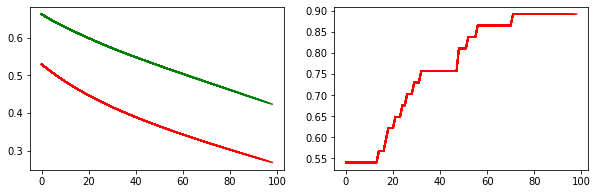

In [ ]:
# define epochs
# do these cases:
# 1) 100 because it gets errors so I can show the usefull of confusion matrix and classification report
# 2) 300 is better and still has some errors
epochs = 100

# cost values (losses)
trainLoss = np.zeros(shape = (epochs))
validLoss = np.zeros(shape = (epochs))

# metric value
# accuracy
validAcc = np.zeros(shape = (epochs))

# plot to display training online
fig, ax = plt.subplots(1, 2, figsize = (10, 3))

# train in each epoch
for i in range(epochs):
    
#     print(f"epoch {i}")
    
    # Use train dataset
    
    
    # 1
    # get model predictions
    predictions = model.forward(X_train)
       
    # 2
    # get cost function value (loss)
    loss = costFunction(predictions, y_train)
    
    # add loss value to array
#     trainLoss.append(loss/120)
    trainLoss[i] = loss
    
    # gradients to zero.
    # this is because pytorch accumulates the gradientes in each call to backward() function (next function to use)
    optimizer.zero_grad()
    
    # 3
    # do backprogagation 
    # it is to get the gradient values of loss function wrt each model parameter
    loss.backward()
    
    
    # 4
    # update parameters
    # use the update formular or algorithm to update the models parameters using the gradient values obtained by backpropagation algorithm
    optimizer.step()
    
    
    
    # validation dataset
    # this is just to check the training, no to update parameters
    predictionsVal = model.forward(X_val)
    
    # val loss
    lossVal = costFunction(predictionsVal, y_val)
    
    # add loss value to array
    validLoss[i] = lossVal
    
    # get accuracy value
    validAcc[i] = accuracy_score(
        
        # true values
        y_val.detach().numpy(),
        
        # predicted values
        torch.argmax(predictionsVal, 1).detach().numpy(),
        
    )
    
    
    
    # plot loss values
    
    # add train
    ax[0].plot(trainLoss[0: i], c = "red")
    # add valid
    ax[0].plot(validLoss[0: i], c = "green")
    
    
    # plot metric values
    ax[1].plot(validAcc[0: i], c = "red")
    
    # plot
    fig.canvas.draw()

# Analize on test dataset (unseen data)

In [ ]:
# get test model predictions
predictionsTest = model.forward(X_test)

# get prediction
predictionsTest = torch.argmax(predictionsTest, 1).detach().numpy()

<Axes: >

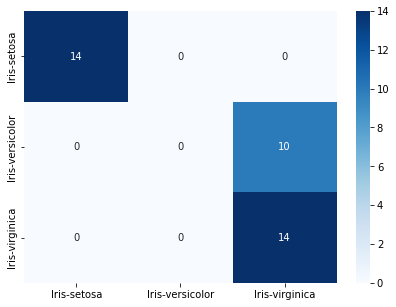

In [ ]:
# get confussion matrix
cm = confusion_matrix(
    
    # labels
    y_test, 
    
    # predictions
    predictionsTest, 
    
    normalize = None,
#     normalize = "true"
    
)

# print(f"class 0: {rFResultsCM[0, :]}")

fig0, ax = plt.subplots(figsize = (7,5))

# plot
sn.heatmap(
    
    # confusion matrix  values
    cm, 
    
    # add values to each element in matrix
    annot=True, 
    
    # add labesl to axis
    yticklabels = [x for x in mappings],
    xticklabels = [x for x in mappings],
    
    # blue scale
    cmap = plt.cm.Blues,
)

In [ ]:
# get classification report
print(
    classification_report(
        y_test, 
        predictionsTest
    )
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.43      0.60        14
           2       0.56      1.00      0.71        10

    accuracy                           0.79        38
   macro avg       0.85      0.81      0.77        38
weighted avg       0.88      0.79      0.78        38

